# Assignment 1 - Classification of Loan Data

PRN: 20030242047

## 1. Data Loading and Pre-processing

Loading the relevant libraries that I will be starting with:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Reading the data stored in Downloads folder

In [2]:
data = pd.read_csv("C:/Users/HP/Downloads/loan data.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


A quick overview of the data:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### The data seems to have a lot of missing values since, not all columns have 614 rows filled. Also, the first column (Loan_ID) is unnecessary for predicting the classification, as the ID has no influence over the Loan getting approved.

 Removing the Loan_ID column:

In [5]:
data = data.drop('Loan_ID', axis=1, )

In [6]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Dealing with missing values:

Checking the no. of missing values in each column:

In [7]:
data.apply(lambda x: sum(x.isnull()), axis=0)

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Then, check how many rows have atleast one missing value:

In [8]:
Miss_data = data[data.isnull().any(axis=1)]
print(Miss_data.shape)
Miss_data

(134, 12)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...
592,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
597,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


In [9]:
Miss_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 605
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             121 non-null    object 
 1   Married            131 non-null    object 
 2   Dependents         119 non-null    object 
 3   Education          134 non-null    object 
 4   Self_Employed      102 non-null    object 
 5   ApplicantIncome    134 non-null    int64  
 6   CoapplicantIncome  134 non-null    float64
 7   LoanAmount         112 non-null    float64
 8   Loan_Amount_Term   120 non-null    float64
 9   Credit_History     84 non-null     float64
 10  Property_Area      134 non-null    object 
 11  Loan_Status        134 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 13.6+ KB


That means, there are 134 rows with atleast 1 missing value in any column

Next, I will check the count of missing values per row and segregate it based on that count. It can be done using a single line of code in pandas:

In [10]:
Miss_data.isnull().sum(axis=1).value_counts()

1    121
2     11
3      2
dtype: int64

There are:
* 121 rows with 1 missing value
* 11 rows with 2 missing values
* 2 rows with 3 missing values

There aren't any rows with missing values equal to 4 or more. Also the counts of 2 or 3 missing valued rows is very very small as compared to the whole data.
So, I will prefer imputing the missing values rather than dropping any.

For imputation, I will be using the KNN Imputer. The reason behind this is that: the data that I have is of people who are applying for the loan. It has all the necessary features that can decide whether the person is eligible to be granted a loan or not. And most of the times these features tend to be similar among a cluster of people. For example:  A married person will most probably have a dependant (his spouse) and/or children which forms a cluster of married people. Due to these implicit patterns in the data, it is better to impute the missing data using K-nearest neighbour imputer as this method fills the missing values based on the data points (in this case, people) which are nearest to that particular row with missing value. This maintains the patterns in the data, which is helpful for the classification task later.

Unfortunately, sklearn.impute.KNNImputer doesn't support categorical data imputation. So I will impute only the numeric data using KNNImputer. For the categorical data, I will just use 'most_frequent' imputation.

In [11]:
# for col in data.columns:
#     print(data[col].unique())     ## Check which columns are actually numeric and which are just categorical labelled as numbers

#### Note that only the 'ApplicantIncome', 'CoapplicantIncome' and 'LoanAmount' are numeric variables.

'Loan_Amount_Term' has fixed values in multiples of 6 namely:    [360. 120. 240. 180.  60. 300. 480.  36.  84.  12.]

and 'Credit_History' has only two values: 0 or 1

In [12]:
from sklearn.impute import KNNImputer

In [13]:
imputer = KNNImputer(n_neighbors=1)
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    X = np.asarray(data[col]).reshape(-1,1)
    data[col] = imputer.fit_transform(X)

For the categorical data, using SimpleImputer and strategy as 'most_frequent'

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']:
    X = np.asarray(data[col]).reshape(-1,1)
    data[col] = imp.fit_transform(X)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


Thus, my data is imputed with appropriate values instead of np.nan

### Dealing with Outliers:

Plotting boxplot for checking outliers for the three numeric columns mentioned before:

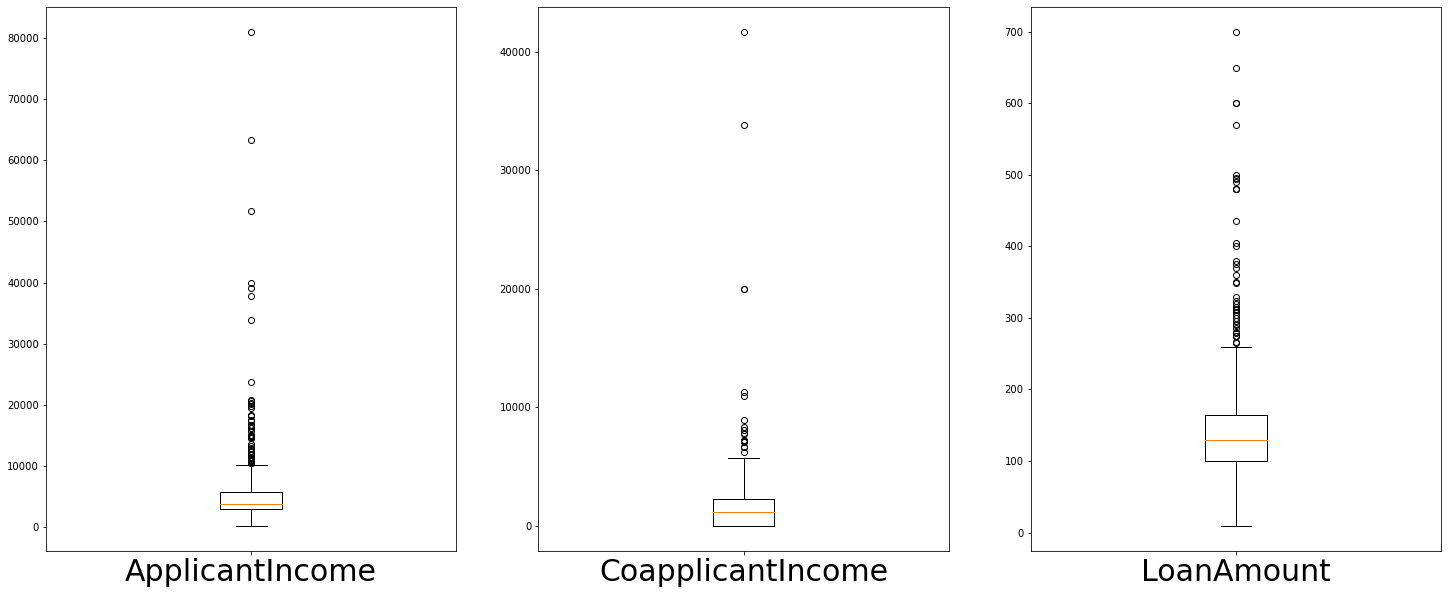

In [17]:
plt.figure(figsize=(25,10))
for i, col in zip(range(1,4),['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']):
    plt.subplot(1, 3, i)
    plt.boxplot(data[col], labels=[col])
    plt.xticks(size=30)

All three columns have many outliers, all on the upper side of the box plot

Defining a function to get the index of outliers for a given column:

In [18]:
def outliers_index(X):
    
    q = np.percentile(X, [0, 25, 50, 75, 100])
    iqr = q[3] - q[1]
    
    lw = q[1] - (1.5 * iqr)
    uw = q[3] + (1.5 * iqr)
    
    indx = np.where( (X<lw) | (X>uw) )
    #X = np.delete(X, indx)
    
    return indx

Getting the list of outlier rows for all three columns:

In [19]:
all_index = []
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    all_index.append(outliers_index(data[col]))
all_index

[(array([  9,  34,  54,  67, 102, 106, 115, 119, 126, 128, 130, 138, 144,
         146, 155, 171, 183, 185, 191, 199, 254, 258, 271, 278, 284, 308,
         324, 333, 369, 370, 409, 424, 432, 438, 443, 467, 475, 478, 483,
         487, 493, 506, 509, 525, 533, 534, 561, 572, 594, 604], dtype=int64),),
 (array([  9,  12,  38, 122, 135, 177, 180, 253, 349, 372, 402, 417, 444,
         506, 513, 523, 581, 600], dtype=int64),),
 (array([  5,   9,  21,  34,  54,  67,  83, 126, 130, 135, 155, 161, 171,
         177, 233, 253, 258, 260, 278, 308, 324, 325, 333, 351, 369, 372,
         381, 391, 409, 432, 487, 506, 514, 523, 525, 536, 561, 572, 592,
         600, 604], dtype=int64),)]

Taking the union of all these outlier rows, so that we know which rows to exclude and their count:

In [20]:
Outlier_rows_array = np.union1d(np.union1d(all_index[0], all_index[1]), all_index[2])
Outlier_rows_array

array([  5,   9,  12,  21,  34,  38,  54,  67,  83, 102, 106, 115, 119,
       122, 126, 128, 130, 135, 138, 144, 146, 155, 161, 171, 177, 180,
       183, 185, 191, 199, 233, 253, 254, 258, 260, 271, 278, 284, 308,
       324, 325, 333, 349, 351, 369, 370, 372, 381, 391, 402, 409, 417,
       424, 432, 438, 443, 444, 467, 475, 478, 483, 487, 493, 506, 509,
       513, 514, 523, 525, 533, 534, 536, 561, 572, 581, 592, 594, 600,
       604], dtype=int64)

In [21]:
Outlier_rows_array.shape

(79,)

So there are 79 rows which have at least 1 outlier in any of the three numeric columns 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'.

To remove the Outlier Rows from the dataframe:

In [22]:
data.drop(index=Outlier_rows_array, inplace=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             535 non-null    object 
 1   Married            535 non-null    object 
 2   Dependents         535 non-null    object 
 3   Education          535 non-null    object 
 4   Self_Employed      535 non-null    object 
 5   ApplicantIncome    535 non-null    float64
 6   CoapplicantIncome  535 non-null    float64
 7   LoanAmount         535 non-null    float64
 8   Loan_Amount_Term   535 non-null    float64
 9   Credit_History     535 non-null    float64
 10  Property_Area      535 non-null    object 
 11  Loan_Status        535 non-null    object 
dtypes: float64(5), object(7)
memory usage: 54.3+ KB


And, we are left with exactly 614 - 79 = 535 rows

### Data Transformation

Next, I will convert categorical data to 0's and 1's so that they can be passed to classifier

In [24]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y


In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']:
    data[col] = le.fit_transform(np.asarray(data[col]))
    print(le.classes_)

['Female' 'Male']
['No' 'Yes']
['0' '1' '2' '3+']
['Graduate' 'Not Graduate']
['No' 'Yes']
[ 12.  36.  60.  84. 120. 180. 240. 300. 360. 480.]
[0. 1.]
['Rural' 'Semiurban' 'Urban']
['N' 'Y']


Note here that, for the Loan_Status column 0 is No and 1 is Yes

In [27]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,146.412162,8,1,2,1
1,1,1,1,0,0,4583.0,1508.0,128.000000,8,1,0,0
2,1,1,0,0,1,3000.0,0.0,66.000000,8,1,2,1
3,1,1,0,1,0,2583.0,2358.0,120.000000,8,1,2,1
4,1,0,0,0,0,6000.0,0.0,141.000000,8,1,2,1


The categorical data is label encoded. 

In [28]:
data.Gender.value_counts()

1    435
0    100
Name: Gender, dtype: int64

There are 435 males and 100 females in the data

In [29]:
data.Married.value_counts()

1    348
0    187
Name: Married, dtype: int64

348: Married and 187: Unmarried

In [30]:
data.Dependents.value_counts()

0    321
2     90
1     84
3     40
Name: Dependents, dtype: int64

In [31]:
data.Education.value_counts()

0    404
1    131
Name: Education, dtype: int64

There are 404 Graduates and 131 non-grads

In [32]:
data.Property_Area.value_counts()

1    205
2    170
0    160
Name: Property_Area, dtype: int64

There are 160 from Rural, 205 from Semi-Urban and 170 from Urban

### Normalize the data

For normalisation, I am going to use MinMaxScaler as it returns the dataframe with values scaled between 0 to 1

In [33]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [34]:
data = sc.fit_transform(data)

In [35]:
normalised_data = pd.DataFrame(data, columns='Gender Married Dependents Education Self_Employed ApplicantIncome CoapplicantIncome LoanAmount Loan_Amount_Term Credit_History Property_Area Loan_Status'.split())

In [36]:
normalised_data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000
mean,0.813084,0.650467,0.239252,0.244860,0.114019,0.390812,0.232027,0.470300,0.851921,0.854206,0.509346,0.695327
std,0.390209,0.477269,0.331575,0.430406,0.318131,0.185542,0.249291,0.177762,0.126007,0.353230,0.392946,0.460700
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.260537,0.000000,0.362550,0.888889,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.345180,0.221014,0.458167,0.888889,1.000000,0.500000,1.000000
75%,1.000000,1.000000,0.333333,0.000000,0.000000,0.474622,0.384845,0.567729,0.888889,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The describe function displays the basic statistics of the dataframe. 

The following interpretations can be concluded from the above table:
* The min and max for all columns is 0 and 1 respectively
* The Gender mean is 0.81 meaning that there are more no. of males applying for the loan
* More than half the people are married 
* Majority have 0 dependents. 
* Education mean is 0.24 i.e. there are more graduated people than there are non-graduates.
* Majority are not self-employed
* 85% people have a credit history
* <b> 69% people have been granted loan in the dataset</b>

##### The above last statement tells us that 69% of the target values are 'Yes'. This means that, the data is imbalanced data

### Balancing the dataset (by method of Upsampling):

In [37]:
normalised_data.Loan_Status.value_counts()

1.0    372
0.0    163
Name: Loan_Status, dtype: int64

### Note that: 
#### 1  =  'Yes'
#### 0  =  'No'

In [38]:
print("The percentage of Yes in Loan_Status is: {} %".format(372*100/(372+163)) )
print("The percentage of No in Loan_Status is: {} %".format(163*100/(372+163)) )

The percentage of Yes in Loan_Status is: 69.53271028037383 %
The percentage of No in Loan_Status is: 30.46728971962617 %


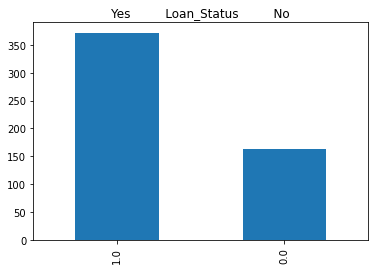

In [39]:
normalised_data.Loan_Status.value_counts().plot(kind='bar', title='Yes         Loan_Status         No')

In [40]:
normalised_data_Yes = normalised_data[normalised_data.Loan_Status==1]  ## Taking only those rows having Yes as Loan_Status
normalised_data_No = normalised_data[normalised_data.Loan_Status==0]   ## Taking only those rows having No as Loan_Status

In [41]:
normalised_data_No_upsampled = normalised_data_No.sample(372, replace=True, random_state=1) ## Upsampling

In [42]:
normalised_data_upsampled = pd.concat([normalised_data_No_upsampled, normalised_data_Yes], axis=0) ## Concatenating upsampled No rows with the original Yes rows

In [43]:
normalised_data_upsampled.Loan_Status.value_counts()  ## Expected value counts to be equal after upsampling

1.0    372
0.0    372
Name: Loan_Status, dtype: int64

In [44]:
print("Before resampling: \n", normalised_data['Loan_Status'].value_counts())
print("\n\nAfter resampling: \n", normalised_data_upsampled['Loan_Status'].value_counts())

Before resampling: 
 1.0    372
0.0    163
Name: Loan_Status, dtype: int64


After resampling: 
 1.0    372
0.0    372
Name: Loan_Status, dtype: int64


<b>Thus, I have balanced the data by upsampling the rows with 'No' as Loan_Status.</b>

The new value counts of Loan_Status are 372 and 372 for both 'Yes' and 'No'

In [45]:
normalised_data = normalised_data_upsampled  ## Overwriting the upsampled data to the original data object

#### Splitting the Data into train and test:

In [46]:
X = normalised_data.iloc[:, :-1]
Y = normalised_data.iloc[:, -1]

In [47]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
118,0.0,1.0,0.000000,0.0,0.0,0.443788,0.000000,0.298805,0.888889,1.0,0.0
469,0.0,0.0,0.000000,0.0,0.0,0.199019,0.000000,0.358566,0.888889,0.0,0.5
233,0.0,0.0,0.000000,0.0,0.0,0.327160,0.000000,0.501992,0.888889,1.0,0.0
456,1.0,0.0,0.000000,0.0,0.0,0.453499,0.366076,0.547459,0.888889,1.0,0.5
445,1.0,0.0,0.000000,1.0,0.0,0.345180,0.225750,0.362550,0.888889,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
529,1.0,1.0,0.000000,0.0,0.0,0.308539,0.342045,0.394422,0.888889,1.0,0.0
530,0.0,0.0,0.000000,0.0,0.0,0.275303,0.000000,0.247012,0.888889,1.0,0.0
531,1.0,1.0,1.000000,0.0,0.0,0.396036,0.000000,0.123506,0.555556,1.0,0.0
532,1.0,1.0,0.333333,0.0,0.0,0.793072,0.042098,0.972112,0.888889,1.0,1.0


In [48]:
Y

118    0.0
469    0.0
233    0.0
456    0.0
445    0.0
      ... 
529    1.0
530    1.0
531    1.0
532    1.0
533    1.0
Name: Loan_Status, Length: 744, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=.25, stratify=Y)

In [51]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_train shape: ", Y_train.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (558, 11)
X_test shape:  (186, 11)
Y_train shape:  (558,)
Y_test shape:  (186,)


I have divided the data into 75% training data and 25% test data

In [52]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
227,0.0,0.0,0.333333,0.0,0.0,0.333467,0.000000,0.581673,0.111111,1.0,0.5
292,1.0,1.0,0.333333,0.0,1.0,0.969366,0.321523,0.689243,0.555556,1.0,1.0
483,1.0,1.0,0.333333,0.0,0.0,0.532386,0.181021,0.067729,0.888889,1.0,0.5
61,0.0,0.0,0.000000,0.0,0.0,0.415457,0.000000,0.505976,0.888889,0.0,0.5
62,1.0,1.0,0.000000,0.0,0.0,0.306137,0.537800,0.649402,0.888889,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
263,1.0,1.0,0.000000,1.0,0.0,0.272800,0.306964,0.382470,0.888889,1.0,0.5
280,1.0,1.0,0.333333,0.0,1.0,0.986085,0.000000,0.581673,0.888889,1.0,0.0
378,1.0,0.0,0.000000,0.0,0.0,0.635699,0.000000,0.382470,0.888889,0.0,0.0
471,1.0,1.0,0.333333,1.0,0.0,0.209130,0.442729,0.474104,0.888889,1.0,1.0


In [53]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
69,1.0,1.0,0.333333,0.0,1.0,0.085094,0.530082,0.402390,0.888889,1.0,1.0
163,1.0,1.0,0.000000,1.0,0.0,0.588948,0.000000,0.601594,0.888889,1.0,1.0
145,1.0,0.0,0.000000,0.0,0.0,0.208930,0.000000,0.215139,1.000000,0.0,0.5
163,1.0,1.0,0.000000,1.0,0.0,0.588948,0.000000,0.601594,0.888889,1.0,1.0
321,1.0,0.0,0.000000,1.0,0.0,0.607268,0.000000,0.494024,0.888889,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
441,1.0,1.0,0.000000,1.0,0.0,0.366803,0.260130,0.458167,0.777778,1.0,0.5
183,1.0,1.0,1.000000,1.0,1.0,0.555912,0.000000,0.482072,0.888889,1.0,0.0
205,1.0,1.0,0.000000,0.0,0.0,0.560216,0.000000,0.980080,0.888889,1.0,1.0
28,1.0,0.0,0.333333,0.0,1.0,0.454700,0.000000,0.386454,0.888889,1.0,0.0


In [54]:
Y_train

227    0.0
292    1.0
483    1.0
61     0.0
62     1.0
      ... 
263    1.0
280    0.0
378    0.0
471    1.0
331    0.0
Name: Loan_Status, Length: 558, dtype: float64

In [55]:
Y_test

69     0.0
163    0.0
145    0.0
163    0.0
321    0.0
      ... 
441    1.0
183    1.0
205    0.0
28     0.0
275    0.0
Name: Loan_Status, Length: 186, dtype: float64

## 2. Model Building, Evaluation and Selection 

First, I will write a single function to avoid repeating the same code for every model and evaluation calculations

In [56]:
from sklearn.metrics import confusion_matrix   ## For Model Evaluation
import seaborn as sns   ## For plotting the Confusion-Matrix

In [57]:
def model_builder_and_evaluator(model, X_train, Y_train, X_test, Y_test):
    
    # Model Building Section
    clf = model
    clf.fit(X_train,Y_train)   ## Fitting the model
    clf_predictions=clf.predict(X_test)  ## Making predictions on the Y_test data using parameters learned from the previous line
    print("Prediction for "+str(model)+" : \n",clf_predictions)
    print("\n\nAccuracy for training data = ", clf.score(X_train, Y_train))
    print("Accuracy for test data = ", clf.score(X_test, Y_test))
    
    # Confusion-Matrix
    conf_mat = confusion_matrix(y_true=Y_test, y_pred=clf_predictions)  ## Creating Confusion Matrix
    # print(conf_mat)
    ax= plt.subplot()
    sns.heatmap(conf_mat, annot=True, ax = ax); ## Displaying Confusion Matrix using seaborn library
    
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['NO', 'YES'])
    ax.yaxis.set_ticklabels(['NO', 'YES'])
    
    # Evaluation metrics:
    TP = conf_mat[0][0]  ## Labelling the elements of the confusion matrix
    FN = conf_mat[0][1]
    FP = conf_mat[1][0]
    TN = conf_mat[1][1]

    Accuracy = (TP + TN)/(TP+FN+FP+TN)     ## Defining Evaluation Metrics that are based on the elements of confusion matrix
    Sensitivity = TP/(TP + FN)
    Specificity = TN/(FP + TN)
    Precision = TP/(TP + FP)
    Recall = TP/(TP + FN)
    F_Score = (2*Precision*Recall)/(Precision + Recall)
    
    print("\nOther Metrics:")
    print("\nSensitivity : ", Sensitivity)
    print("Specificity : ", Specificity)
    print("Precision : ", Precision)
    print("Recall : ", Recall)
    print("F-score : ", F_Score)

### A. Decision Trees Classifier:

In [58]:
## Loading the necessary libraries for Decision Trees

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [59]:
DTC = DecisionTreeClassifier(random_state=0)

Prediction for DecisionTreeClassifier(random_state=0) : 
 [1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1.
 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]


Accuracy for training data =  1.0
Accuracy for test data =  0.8709677419354839

Other Metrics:

Sensitivity :  0.8709677419354839
Specificity :  0.8709677419354839
Precision :  0.8709677419354839
Recall :  0.8709677419354839
F-score :  0.8709677419354839


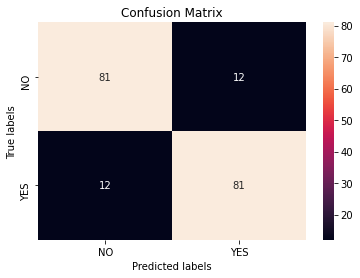

In [60]:
model_builder_and_evaluator(DTC, X_train, Y_train, X_test, Y_test)

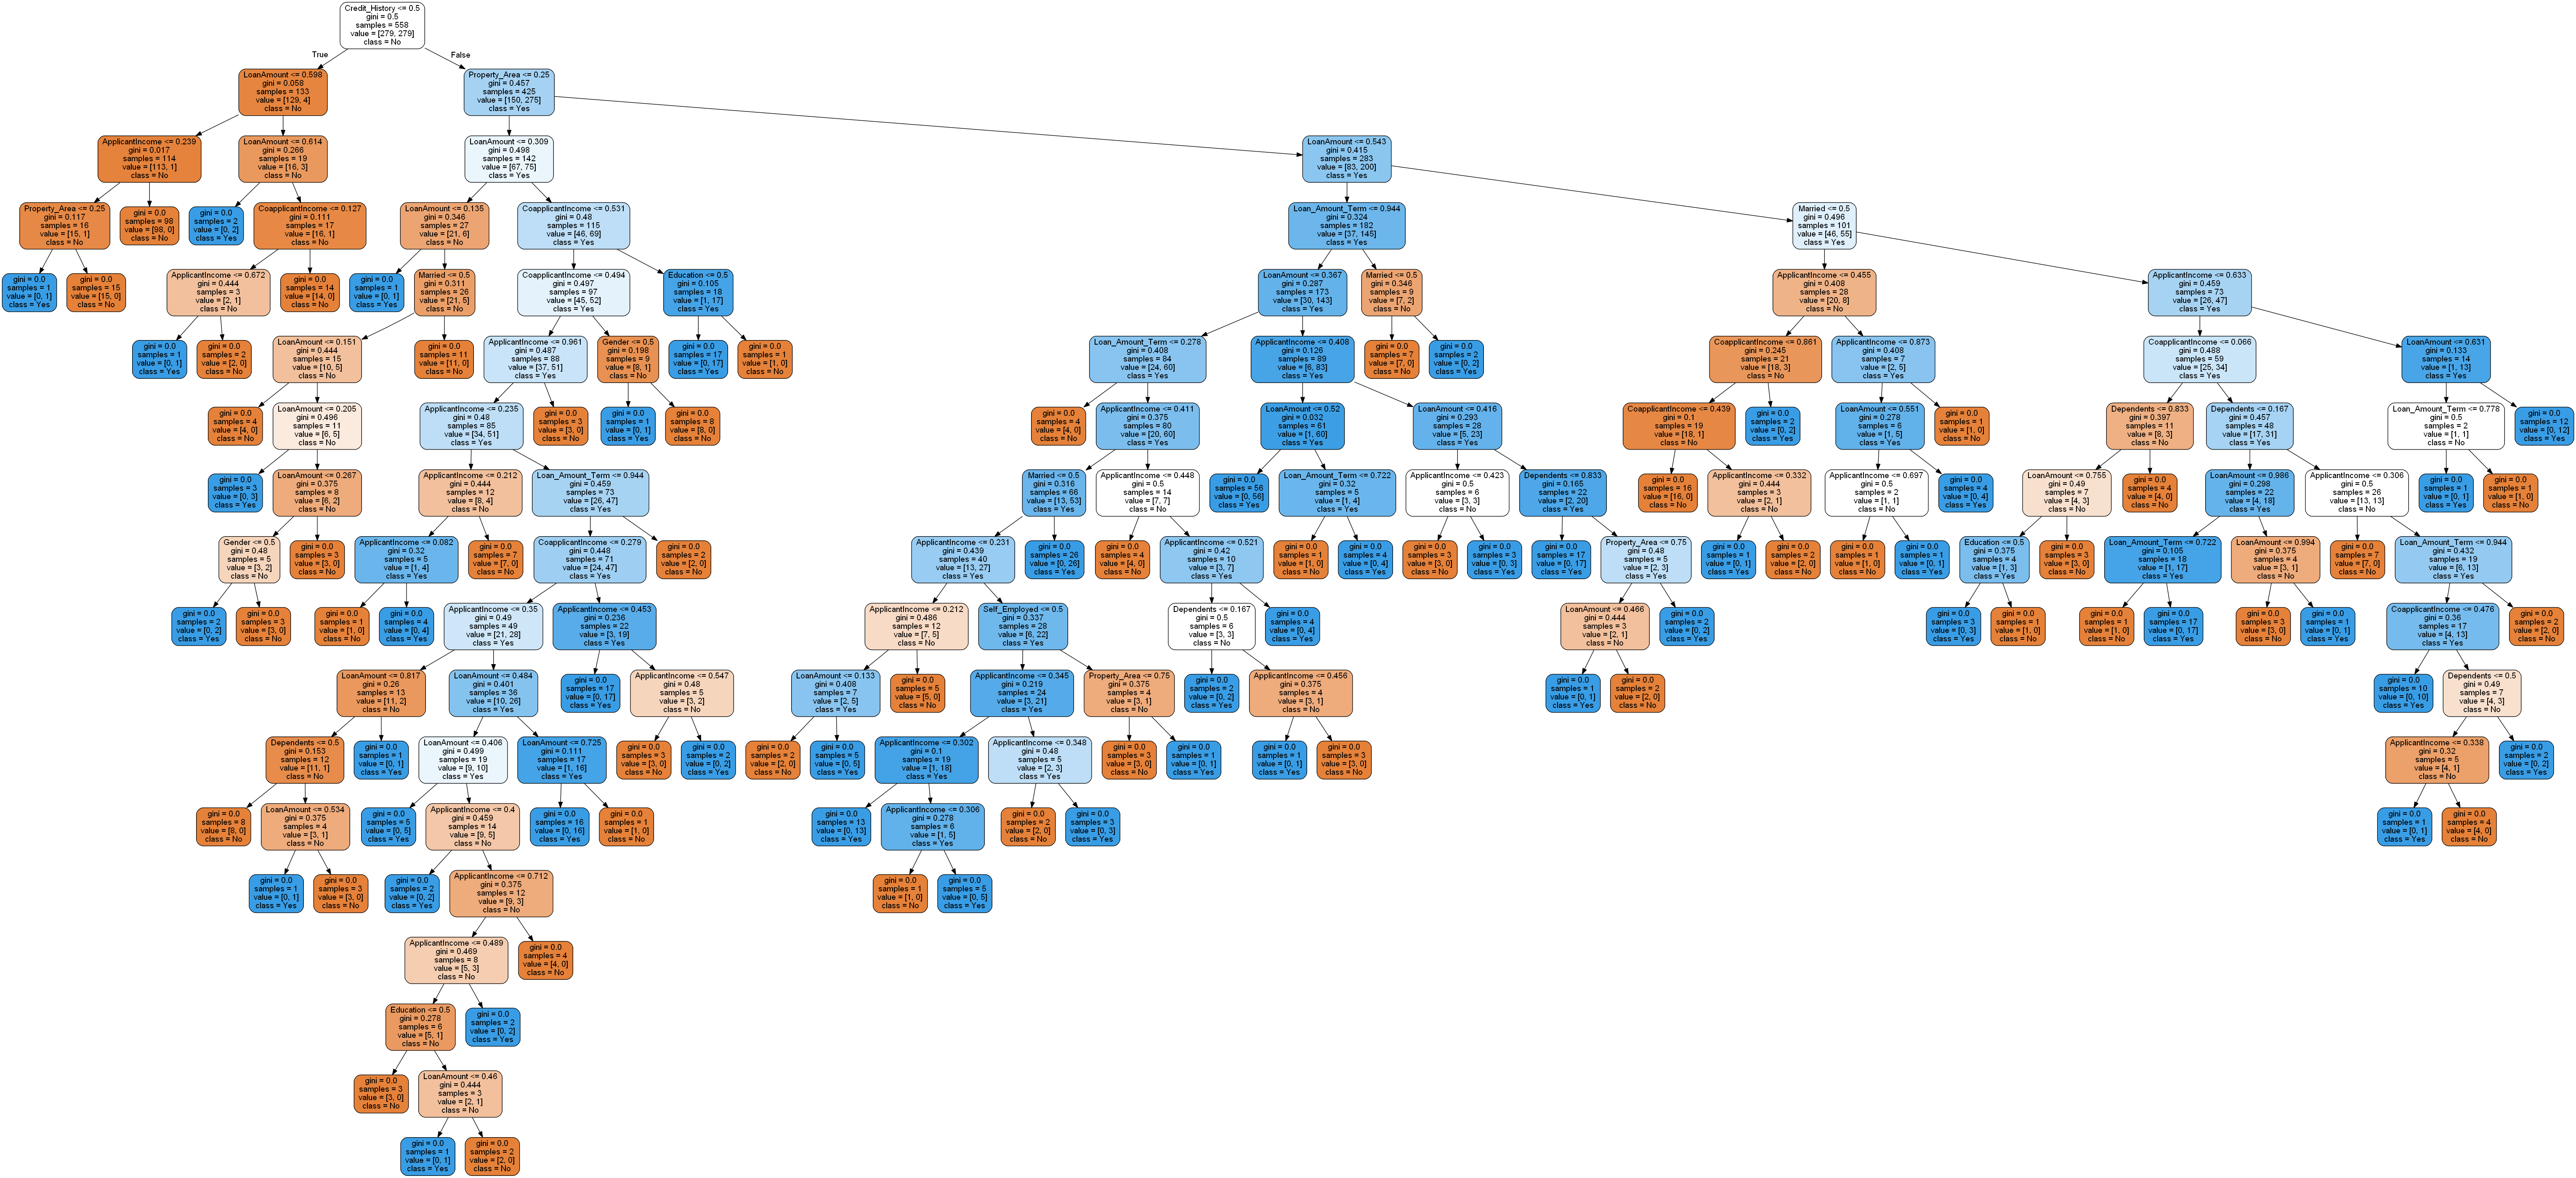

In [61]:
## Creating a tree diagram
dot_data = tree.export_graphviz(DTC, feature_names=X_test.columns, class_names=['No', 'Yes'], filled=True, rounded=True)

## Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

## Show graph
Image(graph.create_png())

### B. Naive Bayes Classifier:

In [62]:
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()

Prediction for GaussianNB() : 
 [1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1.]


Accuracy for training data =  0.7347670250896058
Accuracy for test data =  0.6989247311827957

Other Metrics:

Sensitivity :  0.41935483870967744
Specificity :  0.978494623655914
Precision :  0.9512195121951219
Recall :  0.41935483870967744
F-score :  0.582089552238806


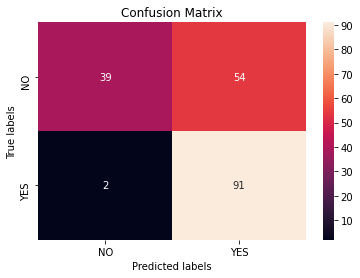

In [63]:
model_builder_and_evaluator(NBC, X_train, Y_train, X_test, Y_test)

### C. Logistic Regression Classifier:

In [64]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

Prediction for LogisticRegression() : 
 [1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0.
 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1.]


Accuracy for training data =  0.7455197132616488
Accuracy for test data =  0.7043010752688172

Other Metrics:

Sensitivity :  0.4946236559139785
Specificity :  0.9139784946236559
Precision :  0.8518518518518519
Recall :  0.4946236559139785
F-score :  0.6258503401360543


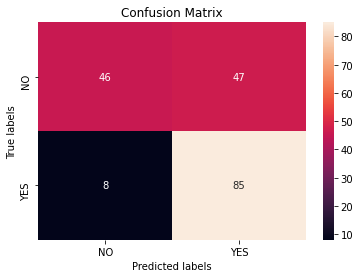

In [65]:
model_builder_and_evaluator(LR, X_train, Y_train, X_test, Y_test)

### D. K Neighbours Classifier:

In [66]:
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier(n_neighbors=3)

Prediction for KNeighborsClassifier(n_neighbors=3) : 
 [1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1.
 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1.
 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1.
 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1.
 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0.]


Accuracy for training data =  0.9050179211469535
Accuracy for test data =  0.7580645161290323

Other Metrics:

Sensitivity :  0.7419354838709677
Specificity :  0.7741935483870968
Precision :  0.7666666666666667
Recall :  0.7419354838709677
F-score :  0.7540983606557377


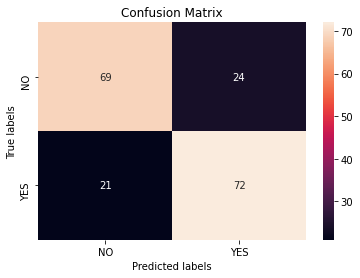

In [67]:
model_builder_and_evaluator(KNC, X_train, Y_train, X_test, Y_test)

### E. Random Forest Classifier:

In [68]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=0)

Prediction for RandomForestClassifier(random_state=0) : 
 [1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]


Accuracy for training data =  1.0
Accuracy for test data =  0.9139784946236559

Other Metrics:

Sensitivity :  0.8709677419354839
Specificity :  0.956989247311828
Precision :  0.9529411764705882
Recall :  0.8709677419354839
F-score :  0.9101123595505618


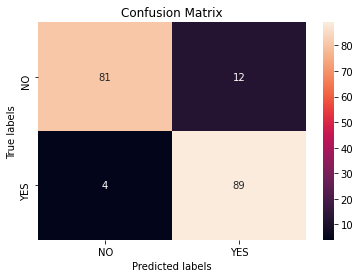

In [69]:
model_builder_and_evaluator(RFC, X_train, Y_train, X_test, Y_test)

### F. Support Vector Classifier:

In [70]:
from sklearn.svm import SVC
svclassifier = SVC(random_state=1)

Prediction for SVC(random_state=1) : 
 [1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0.
 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1.]


Accuracy for training data =  0.7741935483870968
Accuracy for test data =  0.7096774193548387

Other Metrics:

Sensitivity :  0.4946236559139785
Specificity :  0.9247311827956989
Precision :  0.8679245283018868
Recall :  0.4946236559139785
F-score :  0.6301369863013699


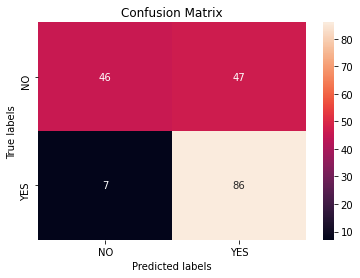

In [71]:
model_builder_and_evaluator(svclassifier, X_train, Y_train, X_test, Y_test)

## Selection:

On comparing the confusion matrix and their corresponding metrics of all 6 classifiers, it is clear that the <b>Random Forest Classifier</b> has performed better than any of the other classifiers. This is because, Random Forest is an ensemble technique which trains different decision trees and makes use of them to output the improved accuracy which is higher than the individual trees. 

<b>In this dataset, Random Forest is showing Accuracy for test data =  0.9139784946236559 = 91.39%</b> . Also the other metrics like Precision, Recall, Sensitivity, Specificity and F-score are all above 87% which are best among the 6.

The next in line after Random Forest is the Decision Tree itself with Accuracy for test data =  0.8709677419354839

followed by K Neighbour Classifier at Accuracy for test data =  0.7580645161290323

Also note that, only the Random Forest and Decision Tree have been able to achieve Accuracy for Training data = 1.0 which means its training performance is very good and is an excellent classifier.

In [90]:
import sklearn.metrics as metrics
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)
preds = clf.predict_proba(X_test)
clf.score(X_test, Y_test)

0.9086021505376344

In [109]:
preds_prob = []
for i in range(0, 372, 2):
    preds_prob.append(preds.flatten()[i])

In [110]:
preds

array([[0.21, 0.79],
       [0.73, 0.27],
       [1.  , 0.  ],
       [0.73, 0.27],
       [0.43, 0.57],
       [0.97, 0.03],
       [0.02, 0.98],
       [0.08, 0.92],
       [0.09, 0.91],
       [0.2 , 0.8 ],
       [0.76, 0.24],
       [0.1 , 0.9 ],
       [0.91, 0.09],
       [0.04, 0.96],
       [0.29, 0.71],
       [0.27, 0.73],
       [0.73, 0.27],
       [0.96, 0.04],
       [0.7 , 0.3 ],
       [0.21, 0.79],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.9 , 0.1 ],
       [0.36, 0.64],
       [0.98, 0.02],
       [0.54, 0.46],
       [0.15, 0.85],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.73, 0.27],
       [0.74, 0.26],
       [0.09, 0.91],
       [0.6 , 0.4 ],
       [0.92, 0.08],
       [0.4 , 0.6 ],
       [0.26, 0.74],
       [0.73, 0.27],
       [0.16, 0.84],
       [0.98, 0.02],
       [0.1 , 0.9 ],
       [0.98, 0.02],
       [0.76, 0.24],
       [0.23, 0.77],
       [0.16, 0.84],
       [0.44, 0.56],
       [0.4 , 0.6 ],
       [0.9 , 0.1 ],
       [0.49,

In [111]:
preds_prob

[0.21,
 0.73,
 1.0,
 0.73,
 0.43,
 0.97,
 0.02,
 0.08,
 0.09,
 0.2,
 0.76,
 0.1,
 0.91,
 0.04,
 0.29,
 0.27,
 0.73,
 0.96,
 0.7,
 0.21,
 0.97,
 0.15,
 0.9,
 0.36,
 0.98,
 0.54,
 0.15,
 0.98,
 1.0,
 0.73,
 0.74,
 0.09,
 0.6,
 0.92,
 0.4,
 0.26,
 0.73,
 0.16,
 0.98,
 0.1,
 0.98,
 0.76,
 0.23,
 0.16,
 0.44,
 0.4,
 0.9,
 0.49,
 0.91,
 0.16,
 0.6,
 0.11,
 0.9,
 0.9,
 0.22,
 0.16,
 0.86,
 0.43,
 0.2,
 0.24,
 0.7,
 0.11,
 0.96,
 0.9,
 0.08,
 0.96,
 1.0,
 0.16,
 0.43,
 0.03,
 0.19,
 0.3,
 0.24,
 0.89,
 0.98,
 0.14,
 0.43,
 0.96,
 0.92,
 0.98,
 0.94,
 0.16,
 0.93,
 0.11,
 0.92,
 0.18,
 0.4,
 0.84,
 0.95,
 0.3,
 0.32,
 0.99,
 0.37,
 0.74,
 0.89,
 1.0,
 0.98,
 0.61,
 0.98,
 0.31,
 0.66,
 0.14,
 0.86,
 0.84,
 0.13,
 0.45,
 0.98,
 0.93,
 0.24,
 0.28,
 0.2,
 0.95,
 1.0,
 0.39,
 0.2,
 1.0,
 0.81,
 0.1,
 0.02,
 0.95,
 0.99,
 0.57,
 0.06,
 0.21,
 1.0,
 0.37,
 0.96,
 0.18,
 0.21,
 0.87,
 0.17,
 0.24,
 0.74,
 0.07,
 0.35,
 0.92,
 0.0,
 0.15,
 1.0,
 0.06,
 0.06,
 0.93,
 0.49,
 0.04,
 0.03,
 0.25,
 0.18,
 

In [113]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds_prob)
roc_auc = metrics.auc(fpr, tpr)

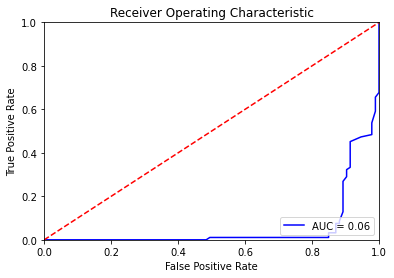

In [114]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()